## Importing of required libraries

In [2]:
import pandas as pd
import numpy as np
import cv2
import tensorflow ,tensorflow.keras as keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os,random
from tqdm import tqdm

## Create The Encoding of Image Labels

In [3]:
# dir_ = "TB01/Normal"
# folder = os.path.join(dir_)
# counter = 1
# for img in os.listdir(folder):
#        old_path = os.path.join(folder,img)
#        new_path = folder+"/Normal."+str(counter)+".png"
#        os.rename(old_path,new_path)
#        counter = counter+1

Encoding of the images to their respective integer to be processed by the neural networks

In [4]:
def encoding(img):
    name = str(img.split(".")[0])
    if name == "Normal":
        return 0
    elif name == "Tuberculosis":
        return 1

Extracting the images from their respective png format to array pixels which can be read by the neural networks

In [5]:
working_directory = "TB01"
categories = ["Normal","Tuberculosis"]
data = []
for category in categories:
    folder = os.path.join(working_directory,category)
    for img in tqdm(os.listdir(folder)):
        label = encoding(img)
        image_path = os.path.join(folder,img)
        image = cv2.imread(image_path)
        image = cv2.resize(image,(180,180))
        data.append([image,label])

100%|████████████████████████████████████████████████████████████████████████████████| 698/698 [00:25<00:00, 26.98it/s]


Shuffle the data to obtain the mixed proportion of the data between the training sample of the data

In [6]:
random.shuffle(data)

Converting the extracted images into numpy array for the easy process of preprocessing in the neural networks

In [7]:
feature,target = [],[]
for i,j in np.array(data):
    feature.append(i)
    target.append(j)
X = np.array(feature)/255
y = np.array(target)

Plotting the label sample to see the trends of the data distribution 

<AxesSubplot:ylabel='count'>

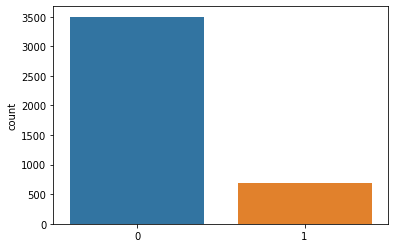

In [8]:
sns.countplot(y)

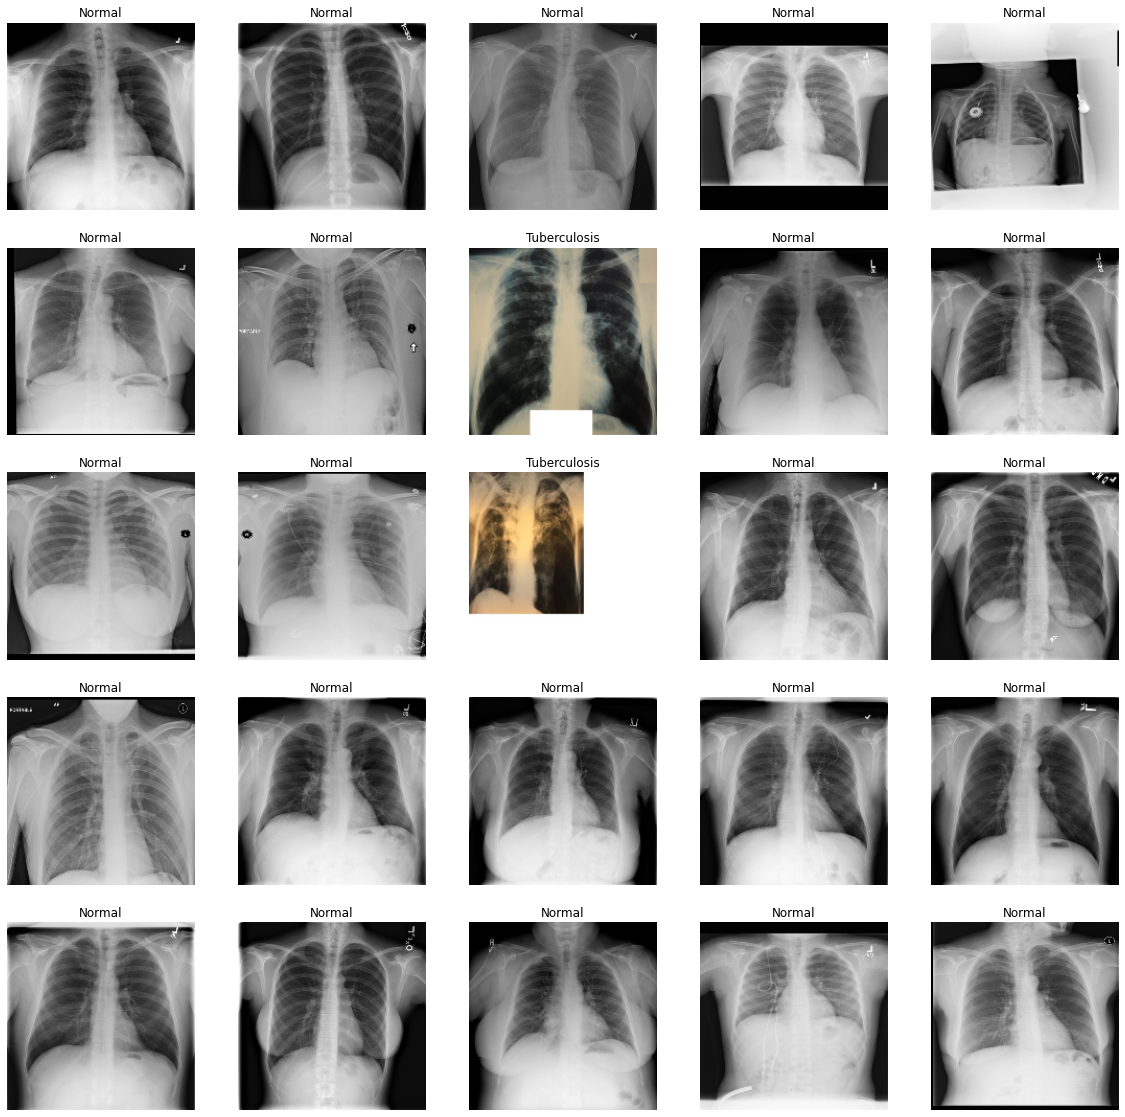

In [9]:
plt.figure(figsize=(20,20))
counter = 1
for i in range(25):
    plt.subplot(5,5,counter)
    plt.imshow(X[i])
    plt.axis("off")
    if y[i] == 0:
        plt.title("Normal")
    elif y[i] == 1:
        plt.title("Tuberculosis")
    counter = counter + 1
plt.show()

In [36]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=0)

Lets build a Convolution Neural Network with 3 convolutional layers and 3 dense layers where the ouput layer will be supervised with the softmax activation function

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(30,30,3),activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(rate=0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.1))

model.add(Dense(units=2,activation="softmax"))

In [38]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["Accuracy"])

In [39]:
history = model.fit(x = X_train,
                    y = y_train,
                    validation_data=(X_test,y_test),
                    epochs=15
                   )

Epoch 1/15
105/105 [==============================] - 20s 170ms/step - loss: 0.3409 - Accuracy: 0.8633 - val_loss: 0.1738 - val_Accuracy: 0.9262
Epoch 2/15
105/105 [==============================] - 17s 160ms/step - loss: 0.1901 - Accuracy: 0.9303 - val_loss: 0.1495 - val_Accuracy: 0.9321
Epoch 3/15
105/105 [==============================] - 15s 144ms/step - loss: 0.1264 - Accuracy: 0.9568 - val_loss: 0.1061 - val_Accuracy: 0.9607
Epoch 4/15
105/105 [==============================] - 15s 148ms/step - loss: 0.1095 - Accuracy: 0.9619 - val_loss: 0.1303 - val_Accuracy: 0.9548
Epoch 5/15
105/105 [==============================] - 17s 162ms/step - loss: 0.1003 - Accuracy: 0.9628 - val_loss: 0.1030 - val_Accuracy: 0.9667
Epoch 6/15
105/105 [==============================] - 17s 158ms/step - loss: 0.0736 - Accuracy: 0.9744 - val_loss: 0.0773 - val_Accuracy: 0.9762
Epoch 7/15
105/105 [==============================] - 15s 142ms/step - loss: 0.0717 - Accuracy: 0.9783 - val_loss: 0.0694 - val_Ac

In [40]:
ht = pd.DataFrame(history.history)
loss,val_loss = ht['loss'],ht['val_loss']
acc,val_acc = ht['Accuracy'],ht['val_Accuracy']
epochs = history.epoch

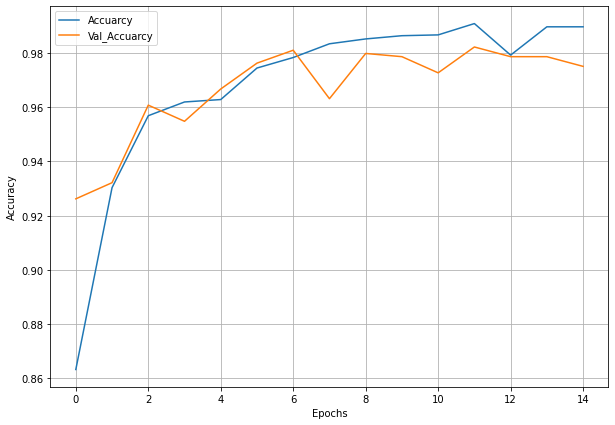

In [41]:
plt.figure(figsize=(10,7))
plt.plot(epochs,acc,label="Accuarcy")
plt.plot(epochs,val_acc,label="Val_Accuarcy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.grid()

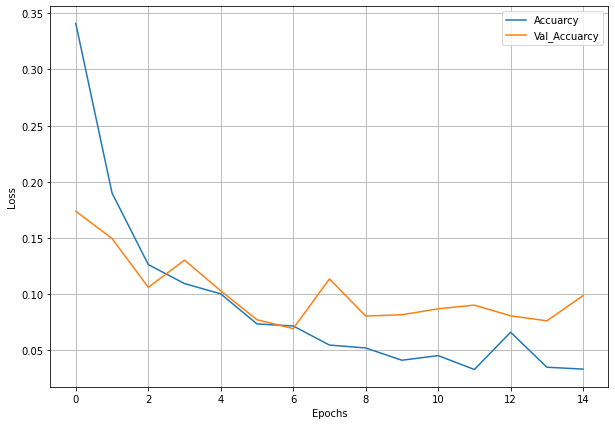

In [42]:
plt.figure(figsize=(10,7))
plt.plot(epochs,loss,label="Accuarcy")
plt.plot(epochs,val_loss,label="Val_Accuarcy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.grid()

Well from the graphs above the trends of model is not quite well as expected because of several reasons which may be due to small number of data samples

Lets plot the confusion matrix to identify the actual number of true positives and true negatives on the samples set

27/27 [==============================] - 2s 32ms/step


Text(0.5, 24.0, 'Original')

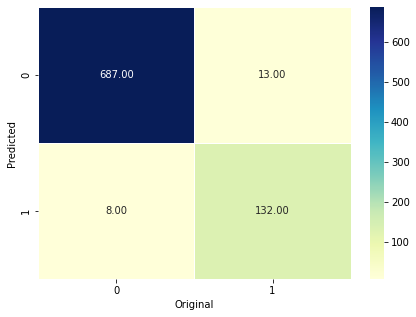

In [43]:
from sklearn.metrics import confusion_matrix
pr = model.predict(X_test)
pred = []
for i in pr:
    x = np.argmax(i)
    pred.append(x)
pred = np.array(pred)
fig,ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(confusion_matrix(y_test,pred),
                annot=True,
                linewidths=0.5,
                fmt = '.2f',
                cmap='YlGnBu'
                )
plt.ylabel('Predicted')
plt.xlabel('Original')

In [44]:
model.save("TB_MODEL.h5")

In [3]:
#import pickle
#models = pickle.load(open("tb_model.h5","rb"))
#models = keras.models.load_model("tb_model.h5")

1/1 [==============================] - 9s 9s/step
Tuberculosis


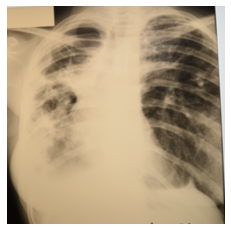

In [48]:
def predict(model,image):
    image = f"TB01/Tuberculosis/Tuberculosis.{image}.png"
    img = cv2.imread(image)
    image = keras.preprocessing.image.load_img(image,target_size=(30,30))
    image = keras.preprocessing.image.img_to_array(image)
    image = image/255
    image = tensorflow.expand_dims(image,0)
    pred_ = model.predict(image)
    pred = np.argmax(pred_)
    if pred == 0:
         print("Normal")
         plt.imshow(img)
         plt.axis("off")
    elif pred == 1:
         print("Tuberculosis")
         plt.imshow(img)
         plt.axis("off")
predict(model,30)